<a href="https://colab.research.google.com/github/Mohammad-Fleity2002/Brain_Tumor_Classification/blob/colab/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os, shutil
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [2]:
import math
import time
import imutils
from sklearn.utils import shuffle
from PIL import Image
import random

In [3]:
# Dataset
import zipfile
z=zipfile.ZipFile(r'/content/archive.zip')
print(z)
z.extractall()

BadZipFile: File is not a zip file

In [11]:
folder_glioma=r'./Data/glioma_tumor/'
count=1
for filename in os.listdir(folder_glioma):
    source=folder_glioma+filename
    destination=folder_glioma+"G_"+str(count)+".jpg"
    os.rename(source,destination)
    count+=1
print("All files are renamed.")

All files are renamed.


In [12]:
folder_normal=r'./Data/normal/'
count=1
for filename in os.listdir(folder_normal):
    source=folder_normal+filename
    destination=folder_normal+"N_"+str(count)+".jpg"
    os.rename(source,destination)
    count+=1
print("All files are renamed.")

All files are renamed.


In [13]:
folder_meningioma=r'./Data/meningioma_tumor/'
count=1
for filename in os.listdir(folder_meningioma):
    source=folder_meningioma+filename
    destination=folder_meningioma+"M_"+str(count)+".jpg"
    os.rename(source,destination)
    count+=1
print("All files are renamed.")

All files are renamed.


In [14]:
folder_pituitary=r'./Data/pituitary_tumor/'
count=1
for filename in os.listdir(folder_pituitary):
    source=folder_pituitary+filename
    destination=folder_pituitary+"P_"+str(count)+".jpg"
    os.rename(source,destination)
    count+=1
print("All files are renamed.")

All files are renamed.


**EDA(exploratory Data Analysis)**

In [15]:
list_M=os.listdir(folder_meningioma)
list_P=os.listdir(folder_pituitary)
list_G=os.listdir(folder_glioma)
list_N=os.listdir(folder_normal)
print("Miningioma:",len(list_M),".\nPituitary:",len(list_P),".\nNormal:",len(list_N),".\nGlioma:",len(list_G),".")

Miningioma: 453 .
Pituitary: 426 .
Normal: 213 .
Glioma: 460 .


**PLOTING THE DATA DISTRIBUTION**

<function matplotlib.pyplot.show(close=None, block=None)>

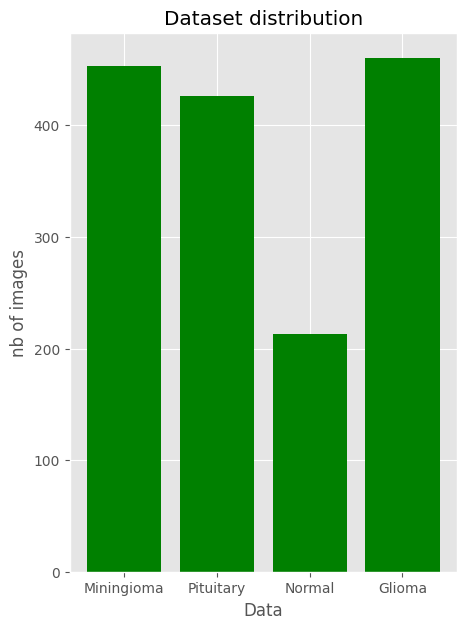

In [20]:
data={'Miningioma':len(list_M),'Pituitary':len(list_P),'Normal':len(list_N),'Glioma':len(list_G)}
typex=data.keys()
# print(typex)
values=data.values()
# print(values)
fig=plt.figure(figsize=(5,7))
plt.bar(typex,values,color="green")
plt.xlabel("Data")
plt.ylabel("nb of images")
plt.title("Dataset distribution")
plt.show

### DATA Augmentation



In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten,Dense ,Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [5]:
# timing function:
def timing(sec_elapsed):
    h=int(sec_elapsed/(60*60))
    m=int(sec_elapsed%(60*60)/60)
    s=sec_elapsed%60
    return f"{h}:{m}:{s}"

In [21]:
def augmented_data(file_dir,n_generated_samples, save_to_dir):
    data_gen=ImageDataGenerator(rotation_range=10,
                      width_shift_range=0.1,
                      height_shift_range=0.1,
                      shear_range=0.1,
                      brightness_range=(0.3,1.0),
                      horizontal_flip=True,
    vertical_flip=True,
                     )
    # ImageDataGenertor(rotation_ranges=10,width_shift_range=0.1,height_shift_range=0.1)
    for filename in os.listdir(file_dir):
        image=cv2.imread(file_dir+'/'+filename)
        image=image.reshape((1,)+image.shape)
        save_prefix='aug_'+filename[:-4]
        i=0
        for batch in data_gen.flow(x=image,batch_size=1,save_to_dir=save_to_dir,save_prefix=save_prefix,save_format="jpg"):
            i+=1
            if i>n_generated_samples:
                break

In [51]:
def delete_folder(folder_path):
    try:
        shutil.rmtree(folder_path)
        print(f"Folder '{folder_path}' and all its contents have been deleted.")
    except Exception as e:
        print(f"Error: {e}")

# Example usage:
delete_folder('augmented_data/N/')

Folder 'augmented_data/N/' and all its contents have been deleted.


In [52]:
start_time = time.time()


augmented_data_path = 'augmented_data/'

augmented_data(file_dir = folder_glioma, n_generated_samples=0, save_to_dir=augmented_data_path+'G')
augmented_data(file_dir = folder_meningioma, n_generated_samples=0, save_to_dir=augmented_data_path+'M')
augmented_data(file_dir = folder_normal, n_generated_samples=1, save_to_dir=augmented_data_path+'N')
augmented_data(file_dir = folder_pituitary, n_generated_samples=0, save_to_dir=augmented_data_path+'P')

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))

0:0:32.814066648483276


In [53]:
def data_summary(main_path):

    nb_P=len(os.listdir(r""+main_path+"P"))
    nb_G=len(os.listdir(r""+main_path+"G"))
    nb_M=len(os.listdir(r""+main_path+"M"))
    nb_N=len(os.listdir(r""+main_path+"N"))

    n=(nb_P+nb_G+nb_M+nb_N)


    P_per=(nb_P*100)/n
    G_per=(nb_G*100)/n
    M_per=(nb_M*100)/n
    N_per=(nb_N*100)/n

    print(f"Number of samples: {n}.")
    print(f"Number of Pituitary samples: {nb_P} = {round(P_per,2)}%.")
    print(f"Number of Normal samples: {nb_N} = {round(N_per,2)}%.")
    print(f"Number of Giloma samples: {nb_G} = {round(G_per,2)}%.")
    print(f"Number of Meningioma samples: {nb_M} = {round(M_per,2)}%.")

In [54]:
data_summary(augmented_data_path)

Number of samples: 1765.
Number of Pituitary samples: 426 = 24.14%.
Number of Normal samples: 426 = 24.14%.
Number of Giloma samples: 460 = 26.06%.
Number of Meningioma samples: 453 = 25.67%.


<function matplotlib.pyplot.show(close=None, block=None)>

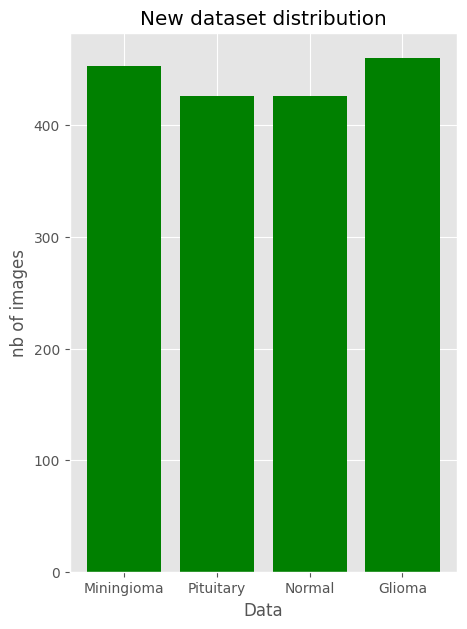

In [56]:
aug_folder_meningioma=r'./augmented_data/M'
aug_folder_pituitary=r'./augmented_data/P'
aug_folder_glioma=r'./augmented_data/G'
aug_folder_normal=r'./augmented_data/N'


list_M=os.listdir(aug_folder_meningioma)
list_P=os.listdir(aug_folder_pituitary)
list_G=os.listdir(aug_folder_glioma)
list_N=os.listdir(aug_folder_normal)


data={'Miningioma':len(list_M),'Pituitary':len(list_P),'Normal':len(list_N),'Glioma':len(list_G)}
typex=data.keys()
values=data.values()
fig=plt.figure(figsize=(5,7))
plt.bar(typex,values,color="green")
plt.xlabel("Data")
plt.ylabel("nb of images")
plt.title("New dataset distribution")
plt.show

**Data preprocessing**

In [57]:
def crop_brain_Tumor(image,plot=False):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply binary threshold
    threshold = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    threshold = cv2.erode(threshold, None, iterations=2)
    threshold = cv2.dilate(threshold, None, iterations=2)

    # Find contours
    contours = cv2.findContours(threshold.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    c = max(contours, key=cv2.contourArea)

    # Get bounding box coordinates
    left = tuple(c[c[:, :, 0].argmin()][0])
    right = tuple(c[c[:, :, 0].argmax()][0])
    top = tuple(c[c[:, :, 1].argmin()][0])
    bot = tuple(c[c[:, :, 1].argmax()][0])

    # Crop the image
    new_image = image[top[1]:bot[1], left[0]:right[0]]

    # Plotting if requested
    if plot:
        plt.figure()
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
        plt.title('Cropped Image')
        plt.axis('off')
        plt.show()

    return new_image

**TESTING THE FUNCTION**

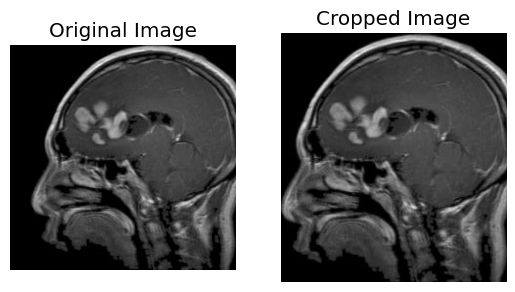

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [2, 2, 2]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [1, 1, 1]]], dtype=uint8)
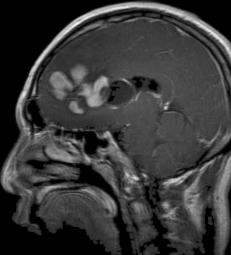

In [58]:
img=cv2.imread("./augmented_data/G/aug_G_104_0_8231.jpg")
crop_brain_Tumor(img,True)

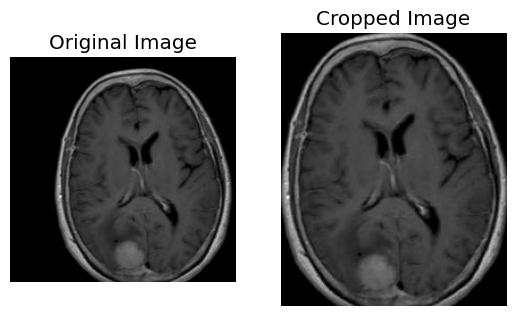

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
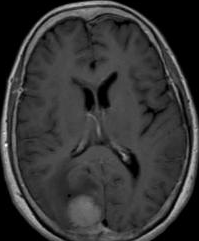

In [59]:
img=cv2.imread("./augmented_data/M/aug_M_109_0_9095.jpg")
crop_brain_Tumor(img,True)

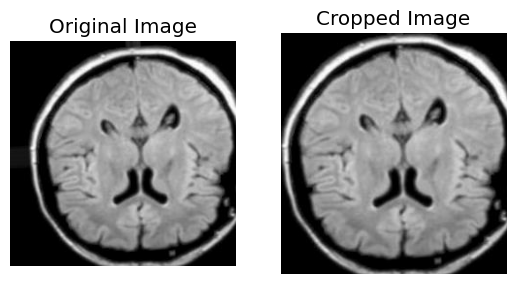

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
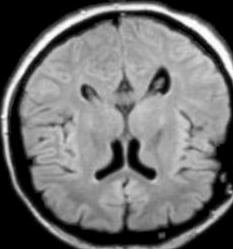

In [60]:
img=cv2.imread("./augmented_data/N/aug_N_103_0_6378.jpg")
crop_brain_Tumor(img,True)

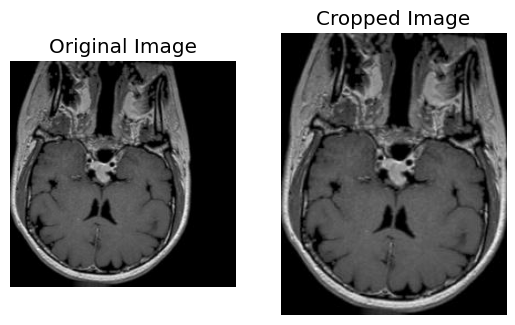

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
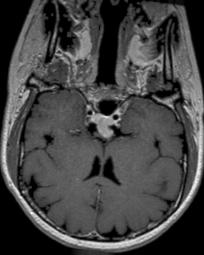

In [61]:
img=cv2.imread("./augmented_data/P/aug_P_110_0_4014.jpg")
crop_brain_Tumor(img,True)

In [72]:
# def load_data(dir_list,image_size):
#     x=[]
#     y=[]
#     image_width,image_height=image_size
#     for directory in dir_list:
#         # print(directory)
#         for filename in os.listdir(directory):
#             # print(os.listdir(directory))
#             if filename[:3] != "aug":
#                 continue
#             img=cv2.imread(directory+""+filename)
#             # print(img)
#             img=crop_brain_Tumor(img,plot=False)
#             img=cv2.resize(img,dsize=(image_width,image_height),interpolation=cv2.INTER_CUBIC)
#             img=img/255.00
#             x.append(img)
#             if directory[-4:]=="yes/":
#                 # print("yes")
#                 y.append(1)
#             else:
#                 y.append(0)
#     x=np.array(x)
#     y=np.array(y)
#     x,y=shuffle(x,y)
#     print(f"Number of example is : {len(x)}")
#     print(f"x SHAPE is : {x.shape}")
#     print(f"y SHAPE is : {y.shape}")
#     return x,y


def load_data(dir_list, image_size):
    x = []
    y = []
    image_width, image_height = image_size

    # Define the class labels
    class_labels = ['P', 'N', 'G', 'M']

    for directory in dir_list:
      print(directory)
      class_name = directory.split('/')[2]  # Extract class name from the folder name
      print(class_name)
      if class_name not in class_labels:            continue  # Skip if the class is not in the defined labels

      class_index = class_labels.index(class_name)  # Assign the corresponding class index
      for filename in os.listdir(directory):
          if filename[:3] != "aug":  # Skip augmented images
              continue
          img = cv2.imread(os.path.join(directory, filename))
          img = crop_brain_Tumor(img, plot=False)
          img = cv2.resize(img, dsize=(image_width, image_height), interpolation=cv2.INTER_CUBIC)
          img = img / 255.00
          x.append(img)
          y.append(class_index)  # Assign class index (0, 1, 2, or 3)

    x = np.array(x)
    y = np.array(y)

    # Shuffle the data
    x, y = shuffle(x, y)

    print(f"Number of examples: {len(x)}")
    print(f"x SHAPE: {x.shape}")
    print(f"y SHAPE: {y.shape}")

    return x, y


In [73]:
start_time = time.time()

dir_list = [aug_folder_pituitary, aug_folder_normal, aug_folder_glioma, aug_folder_meningioma]
IMAGE_WIDTH,IMAGE_HEIGHT=(240,240)

x,y=load_data(dir_list,(IMAGE_WIDTH,IMAGE_HEIGHT))

end_time = time.time()
execution_time = end_time - start_time
print(timing(execution_time))
# print(len(x))

./augmented_data/P
P
./augmented_data/N
N
./augmented_data/G
G
./augmented_data/M
M
Number of examples: 1765
x SHAPE: (1765, 240, 240, 3)
y SHAPE: (1765,)
0:0:10.764697790145874


In [74]:
print(y)

[2 3 1 ... 0 1 0]


In [77]:
def plot_sample_images(x, y, n=50):

    for label in [0,1,2,3]:
        images = x[np.argwhere(y == label)]
        n_images = images[:n]

        columns_n = 10
        rows_n = int(n/ columns_n)

        plt.figure(figsize=(20, 10))

        i = 1
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])

            plt.tick_params(axis='both', which='both',
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False,
                            labelright=False)

            i += 1
        # 0=P 1=N 2=G 3=M
        # label_to_str = lambda label: "P" if label == 1 else "No"
        label_to_str = lambda label: "P" if label == 0 else ("N" if label == 1 else ("G" if label == 2 else "M"))
        plt.suptitle(f"Brain Tumor: {label_to_str(label)}")
        plt.show()


### Plotting a sample of 50 images.

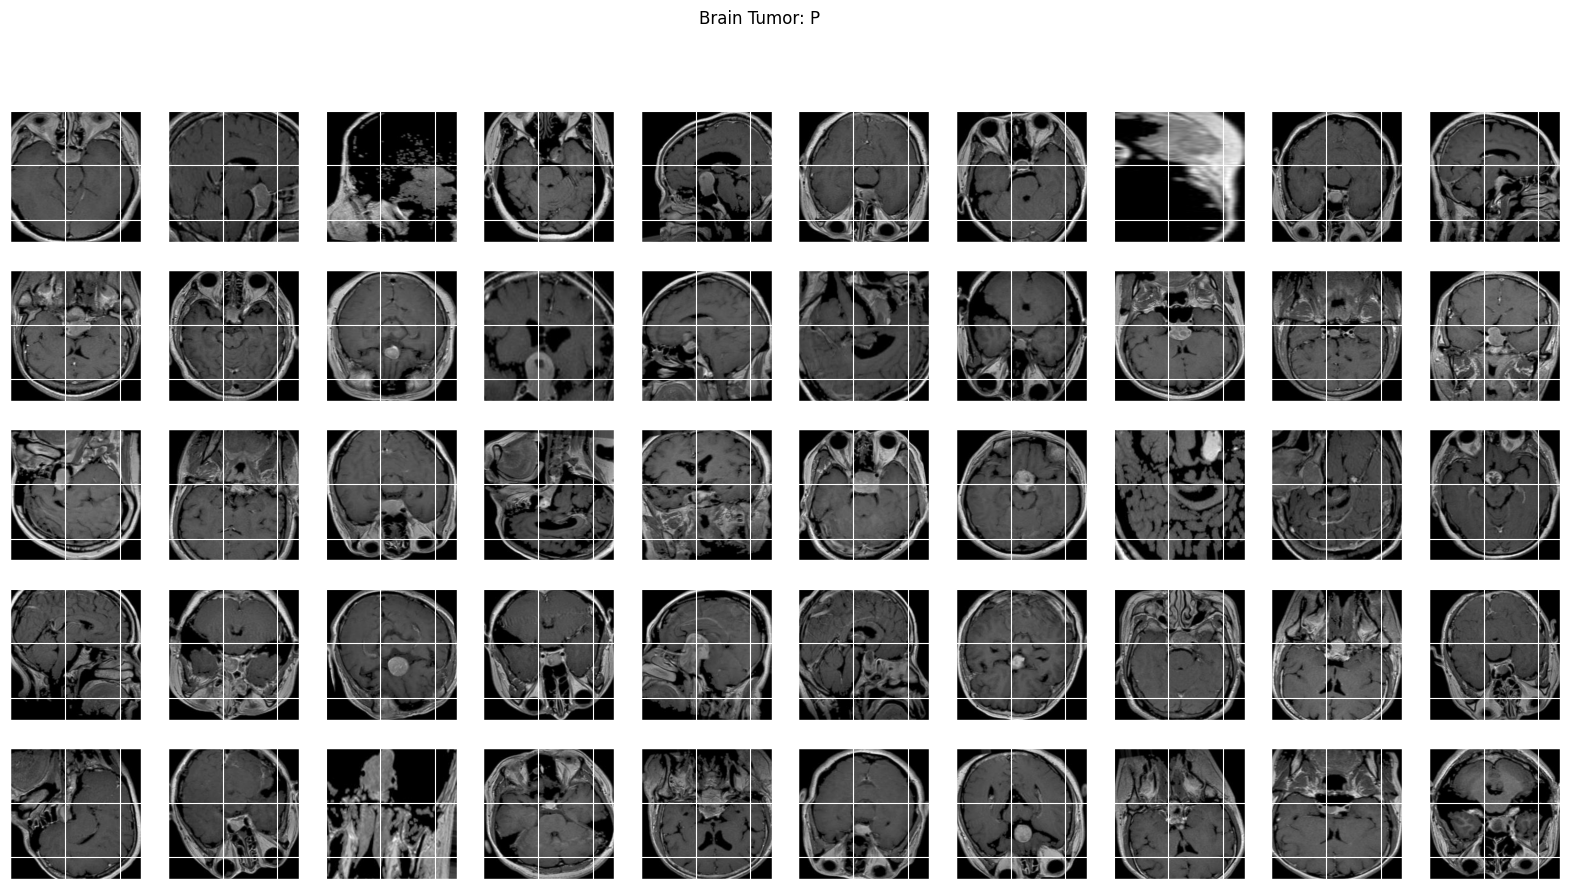

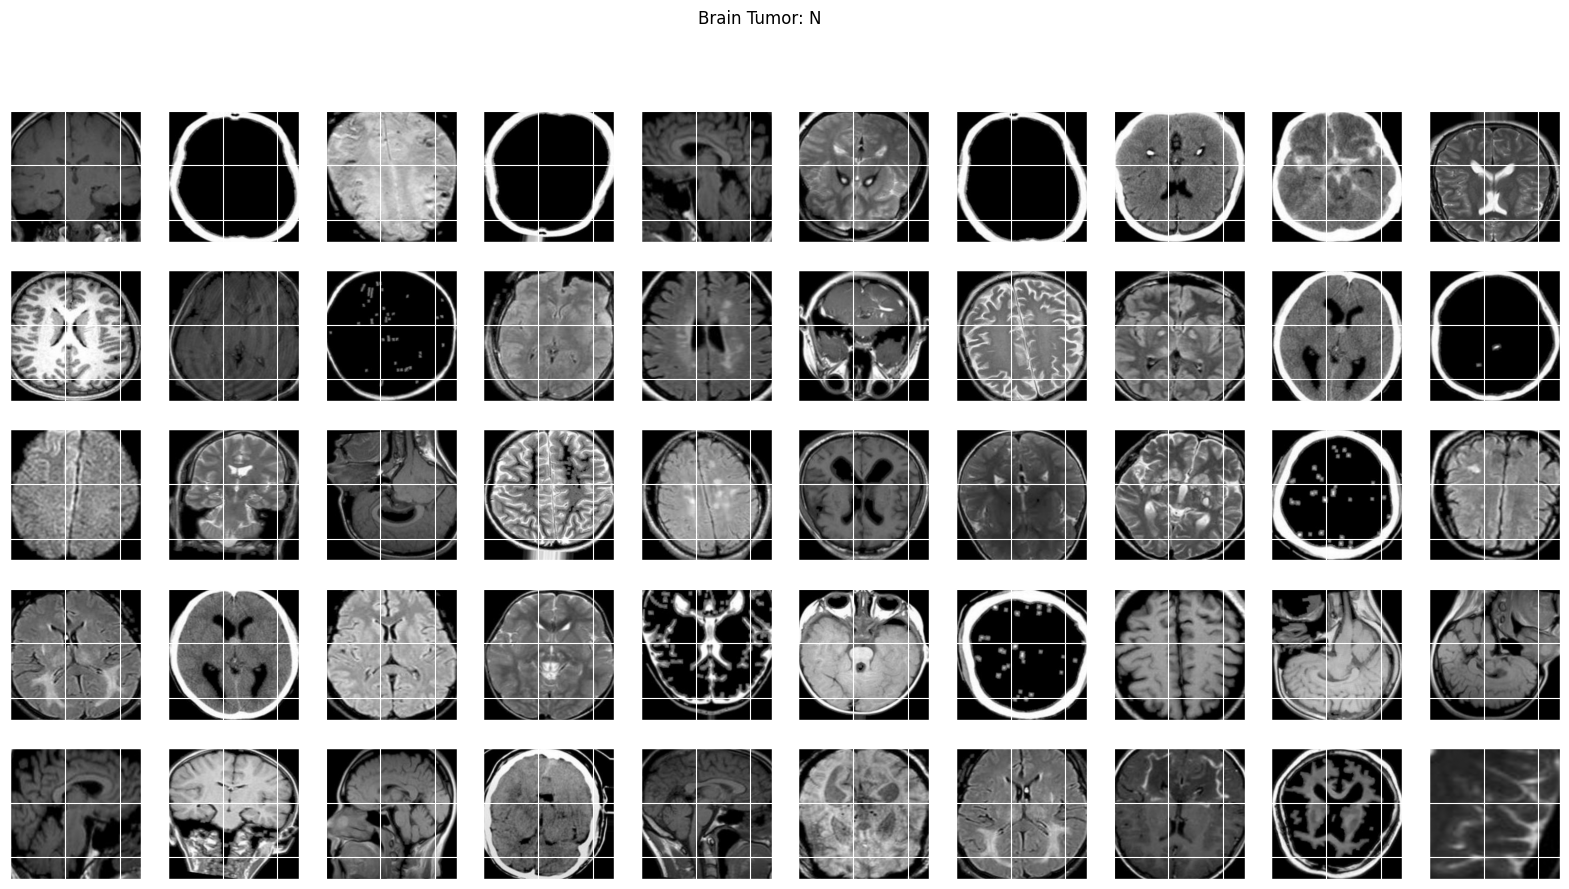

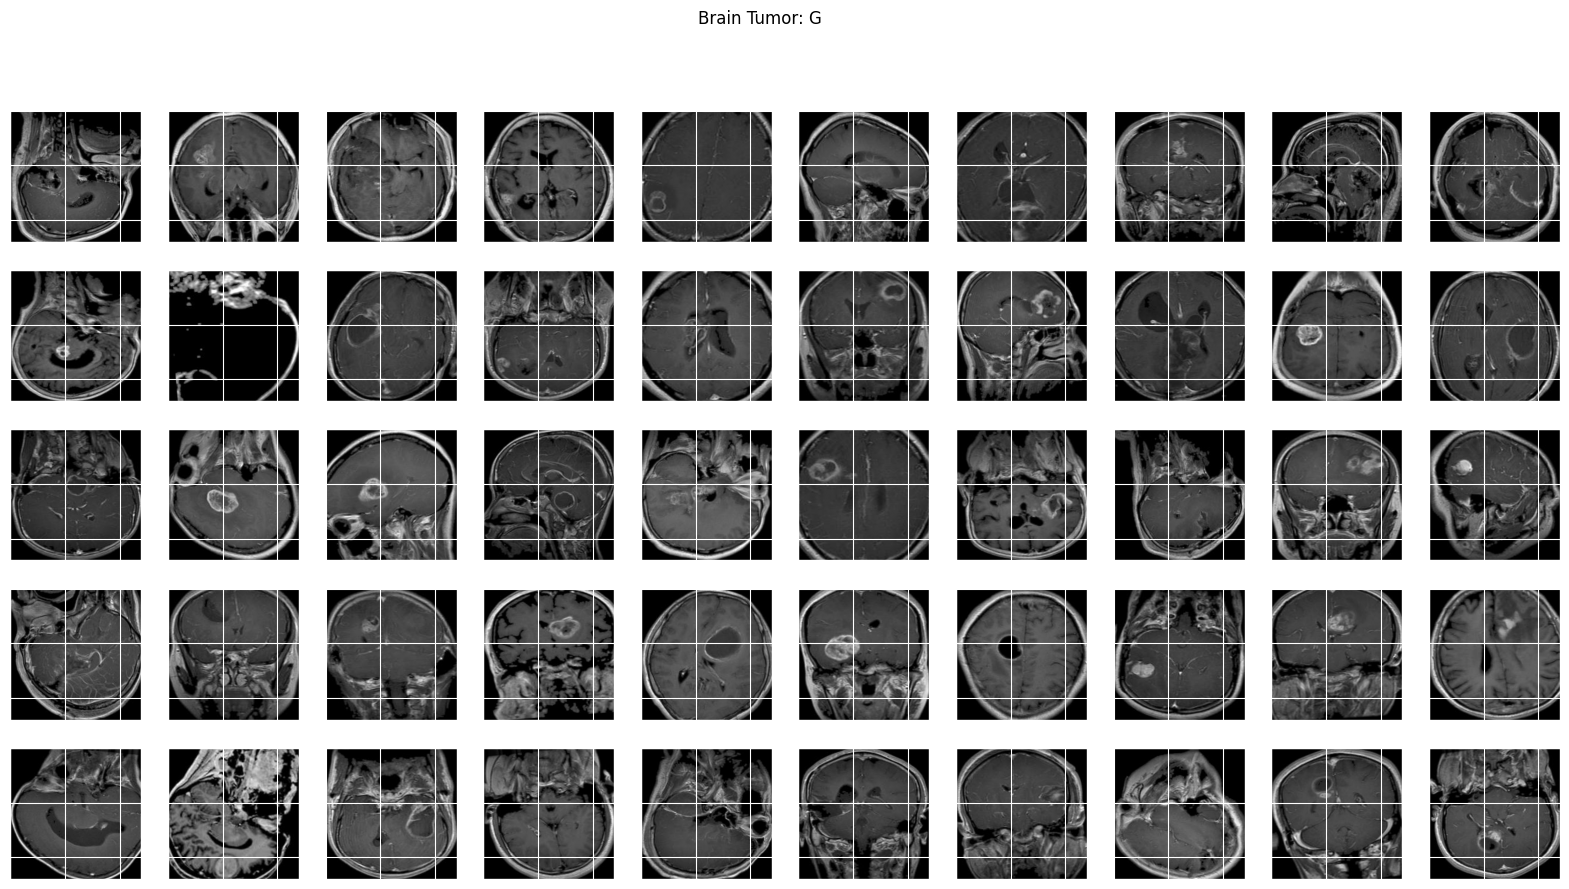

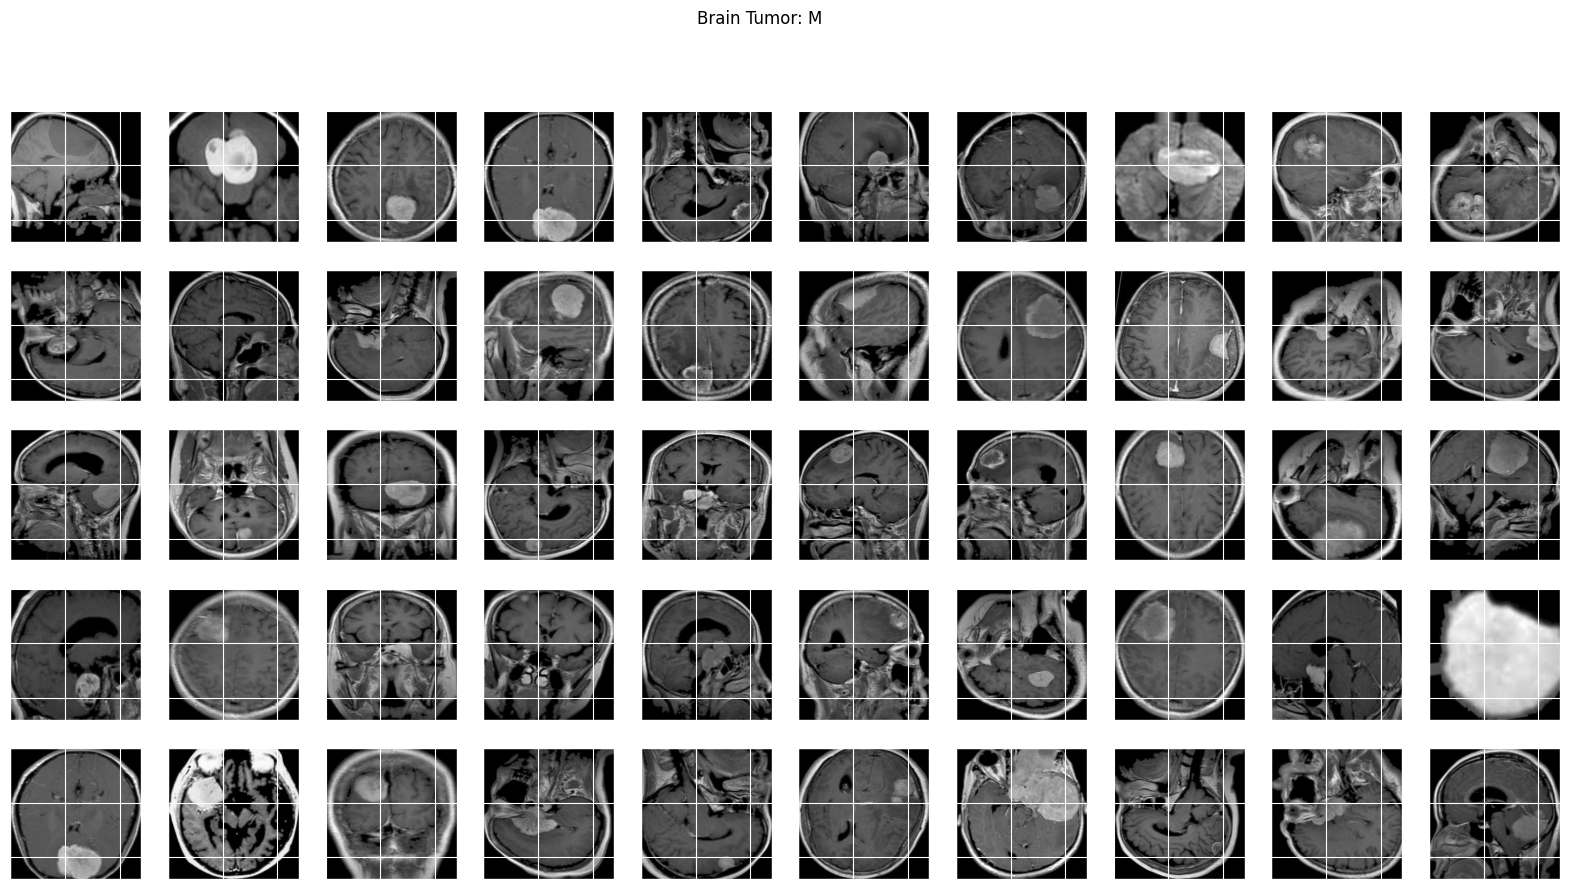

In [78]:
plot_sample_images(x,y)

In [81]:
for filename in os.listdir(folder_glioma):
    img = cv2.imread(folder_glioma + filename)
    img = crop_brain_Tumor(img, False)
    cv2.imwrite(aug_folder_glioma + filename, img)

for filename in os.listdir(folder_meningioma):
    img = cv2.imread(folder_meningioma + filename)
    img = crop_brain_Tumor(img, False)
    cv2.imwrite(aug_folder_meningioma + filename, img)

for filename in os.listdir(folder_normal):
    img = cv2.imread(folder_normal + filename)
    img = crop_brain_Tumor(img, False)
    cv2.imwrite(aug_folder_normal + filename, img)

for filename in os.listdir(folder_pituitary):
    img = cv2.imread(folder_pituitary + filename)
    img = crop_brain_Tumor(img, False)
    cv2.imwrite(aug_folder_pituitary + filename, img)

In [82]:
if not os.path.isdir('Dataset'):
    Base_directory=r'Dataset'
    os.mkdir(Base_directory)

In [83]:
if not os.path.isdir('Dataset/train'):
    train_dir = os.path.join(Base_directory , 'train')
    os.mkdir(train_dir)
if not os.path.isdir('Dataset/test'):
    test_dir = os.path.join(Base_directory , 'test')
    os.mkdir(test_dir)
if not os.path.isdir('Dataset/valid'):
    valid_dir = os.path.join(Base_directory , 'valid')
    os.mkdir(valid_dir)

In [84]:
if not os.path.isdir('tumorous_and_nontumorous/train/G'):
    infected_train_dir = os.path.join(train_dir, 'G')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/G'):
    infected_test_dir = os.path.join(test_dir, 'G')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/G'):
    infected_valid_dir = os.path.join(valid_dir, 'G')
    os.mkdir(infected_valid_dir)

In [85]:
if not os.path.isdir('tumorous_and_nontumorous/train/P'):
    infected_train_dir = os.path.join(train_dir, 'P')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/P'):
    infected_test_dir = os.path.join(test_dir, 'P')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/P'):
    infected_valid_dir = os.path.join(valid_dir, 'P')
    os.mkdir(infected_valid_dir)

In [86]:
if not os.path.isdir('tumorous_and_nontumorous/train/N'):
    infected_train_dir = os.path.join(train_dir, 'N')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/N'):
    infected_test_dir = os.path.join(test_dir, 'N')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/N'):
    infected_valid_dir = os.path.join(valid_dir, 'N')
    os.mkdir(infected_valid_dir)

In [87]:
if not os.path.isdir('tumorous_and_nontumorous/train/M'):
    infected_train_dir = os.path.join(train_dir, 'M')
    os.mkdir(infected_train_dir)
if not os.path.isdir('tumorous_and_nontumorous/test/M'):
    infected_test_dir = os.path.join(test_dir, 'M')
    os.mkdir(infected_test_dir)
if not os.path.isdir('tumorous_and_nontumorous/valid/M'):
    infected_valid_dir = os.path.join(valid_dir, 'M')
    os.mkdir(infected_valid_dir)

In [88]:
print(aug_folder_glioma)
print(aug_folder_meningioma)
print(aug_folder_normal)
print(aug_folder_pituitary)

./augmented_data/G
./augmented_data/M
./augmented_data/N
./augmented_data/P


In [89]:
p=len(os.listdir(aug_folder_pituitary))
n=len(os.listdir(aug_folder_normal))
g=len(os.listdir(aug_folder_glioma))
m=len(os.listdir(aug_folder_meningioma))
print("pituarity:",p,"sample.\n70% for training:",round(p*0.7),".\n15% for testing:",round(p*0.15),".\n15% for validation:",round(p*0.15),".")
print("glioma:",g,"sample.\n70% for training:",round(g*0.7),".\n15% for testing:",round(g*0.15),".\n15% for validation:",round(g*0.15),".")
print("meningioma",m,"sample.\n70% for training:",round(m*0.7),".\n15% for testing:",round(m*0.15),".\n15% for validation:",round(m*0.15),".")
print("normal:",n,"sample.\n70% for training:",round(n*0.7),".\n15% for testing:",round(n*0.15),".\n15% for validation:",round(n*0.15),".")


pituarity: 426 sample.
70% for training: 298 .
15% for testing: 64 .
15% for validation: 64 .
glioma: 460 sample.
70% for training: 322 .
15% for testing: 69 .
15% for validation: 69 .
meningioma 453 sample.
70% for training: 317 .
15% for testing: 68 .
15% for validation: 68 .
normal: 426 sample.
70% for training: 298 .
15% for testing: 64 .
15% for validation: 64 .


In [90]:
D_G_test=r'/content/Dataset/test/G'
D_M_test=r'/content/Dataset/test/M'
D_N_test=r'/content/Dataset/test/N'
D_P_test=r'/content/Dataset/test/P'

D_G_train=r'/content/Dataset/train/G'
D_M_train=r'/content/Dataset/train/M'
D_N_train=r'/content/Dataset/train/N'
D_P_train=r'/content/Dataset/train/P'

D_G_valid=r'/content/Dataset/valid/G'
D_M_valid=r'/content/Dataset/valid/M'
D_P_valid=r'/content/Dataset/valid/P'
D_N_valid=r'/content/Dataset/valid/N'


print(os.path.isdir(D_G_test))
print(os.path.isdir(D_M_test))
print(os.path.isdir(D_N_test))
print(os.path.isdir(D_P_test))

True
True
True
True


In [91]:
files=os.listdir(aug_folder_pituitary)
fnames=[]
for i in range(0,297):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_pituitary,fname)
    dest=os.path.join(D_P_train,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_meningioma)
fnames=[]
for i in range(0,316):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_meningioma,fname)
    dest=os.path.join(D_M_train,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_normal)
fnames=[]
for i in range(0,297):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_normal,fname)
    dest=os.path.join(D_N_train,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_glioma)
fnames=[]
for i in range(0,321):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_glioma,fname)
    dest=os.path.join(D_G_train,fname)
    shutil.copyfile(src,dest)

In [92]:
files=os.listdir(aug_folder_pituitary)
fnames=[]
for i in range(297,(297+64)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_pituitary,fname)
    dest=os.path.join(D_P_test,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_meningioma)
fnames=[]
for i in range(316,(316+68)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_meningioma,fname)
    dest=os.path.join(D_M_test,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_normal)
fnames=[]
for i in range(297,(297+64)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_normal,fname)
    dest=os.path.join(D_N_test,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_glioma)
fnames=[]
for i in range(321,(321+69)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_glioma,fname)
    dest=os.path.join(D_G_test,fname)
    shutil.copyfile(src,dest)

In [93]:
files=os.listdir(aug_folder_pituitary)
fnames=[]
for i in range((297+64),(297+64+64)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_pituitary,fname)
    dest=os.path.join(D_P_valid,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_meningioma)
fnames=[]
for i in range((316+68),(316+68+68)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_meningioma,fname)
    dest=os.path.join(D_M_valid,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_normal)
fnames=[]
for i in range((297+64),(297+64+64)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_normal,fname)
    dest=os.path.join(D_N_valid,fname)
    shutil.copyfile(src,dest)

files=os.listdir(aug_folder_glioma)
fnames=[]
for i in range((321+69),(321+69+69)):
    # if files[i][:3]!="aug":
    #     continue
    fnames.append(files[i])
for fname in fnames:
    src=os.path.join(aug_folder_glioma,fname)
    dest=os.path.join(D_G_valid,fname)
    shutil.copyfile(src,dest)

In [97]:
print(len(os.listdir(D_G_test)))
print(len(os.listdir(D_M_test)))
print(len(os.listdir(D_N_test)))
print(len(os.listdir(D_P_test)))

69
68
64
64


**Model Building**

In [17]:
def remove_ipynb_checkpoints(base_dir):
    for root, dirs, files in os.walk(base_dir):
        for dir_name in dirs:
            if dir_name == '.ipynb_checkpoints':
                shutil.rmtree(os.path.join(root, dir_name))
                print(f"Removed: {os.path.join(root, dir_name)}")

# Example usage:
remove_ipynb_checkpoints('/content/augmented_data')

Removed: /content/augmented_data/.ipynb_checkpoints


In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
                  horizontal_flip=0.4,
                  vertical_flip=0.4,
                  rotation_range=40,
                  shear_range=0.2,
                  width_shift_range=0.4,
                  height_shift_range=0.4,
                  fill_mode='nearest')
# train_datagen = ImageDataGenerator(
#     rescale=1.0/255,
#     rotation_range=30,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )
test_data_gen = ImageDataGenerator(rescale=1.0/255)
valid_data_gen = ImageDataGenerator(rescale=1.0/255)

In [6]:
train_generator = train_datagen.flow_from_directory(
    './Dataset/train/',
    batch_size=32,
    target_size=(240,240),
    class_mode='categorical',
    shuffle=True,
    seed = 42,
    color_mode = 'rgb')


Found 1231 images belonging to 4 classes.


In [7]:
test_generator = train_datagen.flow_from_directory(
    'Dataset/test/',
    batch_size=32, target_size=(240,240),
    class_mode='categorical',
    shuffle=True,
    seed = 42,
    color_mode = 'rgb')

Found 265 images belonging to 4 classes.


In [8]:
valid_generator = train_datagen.flow_from_directory('./Dataset/valid/',
                                                    batch_size=32, target_size=(240,240),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed = 42,
                                                    color_mode = 'rgb')

Found 265 images belonging to 4 classes.


In [9]:
print(train_generator.class_indices)
print(test_generator.class_indices)
print(valid_generator.class_indices)

{'G': 0, 'M': 1, 'N': 2, 'P': 3}
{'G': 0, 'M': 1, 'N': 2, 'P': 3}
{'G': 0, 'M': 1, 'N': 2, 'P': 3}


In [11]:
base_model=VGG19(input_shape=(240,240,3),include_top=False,weights="imagenet")

for layer in base_model.layers:
    layer.trainable=False

x=base_model.output
flat=Flatten()(x)

class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(4,activation='softmax')(class_2)
model_01=Model(base_model.input,output)
model_01.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,948,676 (537.68 MB)

 Trainable params: 120,924,292 (461.29 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [12]:
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', verbose = 1, mode='min',patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose = 1, save_best_only=True, save_weights_only=False, mode='auto',save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuarcy', patience=3, verbose = 1, factor = 0.5, min_lr = 0.0001)

In [13]:
sgd = SGD(learning_rate=0.0001, weight_decay= 1e-6, momentum = 0.9, nesterov = True)
model_01.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

In [14]:
history_01 = model_01.fit(train_generator, steps_per_epoch=10, epochs = 1, callbacks=[es,cp,lrr], validation_data=valid_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.2597 - loss: 1.5295 
Epoch 1: val_loss improved from inf to 1.43679, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 557s 58s/step - accuracy: 0.2583 - loss: 1.5264 - val_accuracy: 0.2264 - val_loss: 1.4368 - learning_rate: 1.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_accuarcy` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


In [16]:
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights="imagenet")

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)

# Fully connected layers
fc1 = Dense(1024, activation='relu')(flat)
dropout1 = Dropout(0.5)(fc1)  # Dropout to reduce overfitting
fc2 = Dense(512, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(fc2)  # Another dropout layer
output = Dense(4, activation='softmax')(dropout2)  # Output layer for 4 classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Use Adam optimizer
              loss='categorical_crossentropy',       # Suitable for multi-class classification
              metrics=['accuracy'])

# Define callbacks
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)
cp = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.00001, verbose=1)


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=10 ,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples,
    epochs=20,
    callbacks=[es, cp, lrr]
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 46,242,372 (176.40 MB)

 Trainable params: 26,217,988 (100.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.2207 - loss: 1.9327 
Epoch 1: val_loss improved from inf to 1.34760, saving model to model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 1349s 35s/step - accuracy: 0.2213 - loss: 1.9299 - val_accuracy: 0.2773 - val_loss: 1.3476 - learning_rate: 1.0000e-04
Epoch 2/20
 1/38 ━━━━━━━━━━━━━━━━━━━━ 20:22 33s/step - accuracy: 0.0938 - loss: 1.7618

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.34760 to 1.26855, saving model to model.keras
38/38 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.0938 - loss: 1.7618 - val_accuracy: 0.4444 - val_loss: 1.2686 - learning_rate: 1.0000e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.3051 - loss: 1.5539 
Epoch 3: val_loss did not improve from 1.26855
38/38 ━━━━━━━━━━━━━━━━━━━━ 1363s 35s/step - accuracy: 0.3052 - loss: 1.5526 - val_accuracy: 0.4062 - val_loss: 1.2975 - learning_rate: 1.0000e-04
Epoch 4/20
 1/38 ━━━━━━━━━━━━━━━━━━━━ 17:58 29s/step - accuracy: 0.1875 - loss: 1.5524
Epoch 4: val_loss did not improve from 1.26855
38/38 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.1875 - loss: 1.5524 - val_accuracy: 0.4444 - val_loss: 1.3235 - learning_rate: 1.0000e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.2993 - loss: 1.4041 
Epoch 5: val_loss did not improve from 1.26855
38/38 ━━━━━━━━━━━━━━━━━━━━ 1323s 35s/step - accuracy: 0.2997 - loss: 1.4036 - val_accurac

In [ ]:
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights="imagenet")

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers
x = base_model.output
flat = Flatten()(x)

# Fully connected layers
fc1 = Dense(1024, activation='relu')(flat)
dropout1 = Dropout(0.5)(fc1)  # Dropout to reduce overfitting
fc2 = Dense(512, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(fc2)  # Another dropout layer
output = Dense(4, activation='softmax')(dropout2)  # Output layer for 4 classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Print the model summary
model.summary()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),  # Use Adam optimizer
              loss='categorical_crossentropy',       # Suitable for multi-class classification
              metrics=['accuracy'])

# Define callbacks
filepath = 'model.keras'
es = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)
cp = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.00001, verbose=1)

sgd = SGD(learning_rate=0.0001, weight_decay= 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy', optimizer = sgd, metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=10 ,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples,
    epochs=20,
    callbacks=[es, cp, lrr]
)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 46,242,372 (176.40 MB)

 Trainable params: 26,217,988 (100.01 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.2971 - loss: 1.7556 

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 1: val_loss improved from inf to 1.43352, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 568s 59s/step - accuracy: 0.2973 - loss: 1.7600 - val_accuracy: 0.2642 - val_loss: 1.4335 - learning_rate: 1.0000e-04
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.2159 - loss: 1.7997 
Epoch 2: val_loss improved from 1.43352 to 1.41907, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 536s 56s/step - accuracy: 0.2188 - loss: 1.7897 - val_accuracy: 0.2377 - val_loss: 1.4191 - learning_rate: 1.0000e-04
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.2877 - loss: 1.6710 
Epoch 3: val_loss improved from 1.41907 to 1.38872, saving model to model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 535s 56s/step - accuracy: 0.2863 - loss: 1.6714 - val_accuracy: 0.2830 - val_loss: 1.3887 - learning_rate: 1.0000e-04
Epoch 4/20
 9/10 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 0.2388 - loss: 1.5789
Epoch 4: val_loss improved from 1.38872 to 1.37031, saving model to model

In [10]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

lr_schedule = ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=10000,
    decay_rate=0.9
)
optimizer = SGD(learning_rate=lr_schedule)
base_model = VGG19(input_shape=(240, 240, 3), include_top=False, weights="imagenet")

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

for layer in base_model.layers[-4:]:  # Unfreeze last 4 layers
    layer.trainable = True

x = base_model.output
flat = Flatten()(x)

fc1 = Dense(512, activation='relu')(flat)
dropout1 = Dropout(0.5)(fc1)
fc2 = Dense(256, activation='relu')(dropout1)
dropout2 = Dropout(0.5)(fc2)  # Another dropout layer
output = Dense(4, activation='softmax')(dropout2)  # Output layer for 4 classes

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Print the model summary
model.summary()


model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
filepath = 'model_1.keras'
es = EarlyStopping(monitor='val_loss', mode='min', patience=4, verbose=1)
cp = ModelCheckpoint(filepath, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
lrr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.0001, verbose=1)


# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=10 ,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples,
    epochs=2,
    callbacks=[es, cp, lrr]
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 33,002,308 (125.89 MB)

 Trainable params: 20,057,348 (76.51 MB)

 Non-trainable params: 12,944,960 (49.38 MB)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34s/step - accuracy: 0.2702 - loss: 1.7408 

KeyboardInterrupt: 

In [11]:
batch_size=16
image_shape = (224, 224)

# Define ImageDataGenerators with augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    # Rescale pixel values to [0,1]
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation and test generators should not have augmentation, just rescaling
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    './Dataset/train/',
    color_mode="grayscale",
    target_size=image_shape,
    batch_size=batch_size,
)

validation_generator = val_datagen.flow_from_directory(
    './Dataset/valid/',
    color_mode="grayscale",
    target_size=image_shape,
    batch_size=batch_size,
    shuffle=False
)

test_generator = test_datagen.flow_from_directory(
    './Dataset/test/',
    color_mode="grayscale",
    target_size=image_shape,
    batch_size=batch_size,
    shuffle=False
)

Found 1231 images belonging to 4 classes.
Found 265 images belonging to 4 classes.
Found 265 images belonging to 4 classes.


In [12]:
def count_images_in_directory(directory):
    """Count the number of images in each class within a given directory."""
    counts = {}
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):  # Ensure it's a directory
            counts[class_name] = len(os.listdir(class_path))  # Count files
    return counts

# Count images for each split
train_counts = count_images_in_directory(r'/content/Dataset/train')
val_counts = count_images_in_directory(r'/content/Dataset/valid')
test_counts = count_images_in_directory(r'/content/Dataset/test')

# Print the counts
print("Training Set Counts:")
print(train_counts)
print("\nValidation Set Counts:")
print(val_counts)
print("\nTest Set Counts:")
print(test_counts)

Training Set Counts:
{'P': 297, 'N': 297, 'G': 321, 'M': 316}

Validation Set Counts:
{'P': 64, 'N': 64, 'G': 69, 'M': 68}

Test Set Counts:
{'P': 64, 'N': 64, 'G': 69, 'M': 68}


In [18]:
class_names = [class_name for class_name in os.listdir(r'/content/augmented_data')]
class_names

['P', 'N', 'G', 'M']

In [19]:
def show_samples(data_dir, class_names, num_samples=3):
    """
    Display a random sample of images from each class.

    Parameters:
    - data_dir: The base directory containing subfolders for each class.
    - class_names: List of class names (subfolders in the data_dir).
    - num_samples: Number of random samples to display from each class.
    """
    fig, axes = plt.subplots(len(class_names), num_samples, figsize=(num_samples * 3, len(class_names) * 3))

    for i, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        images = os.listdir(class_path)

        # Randomly select images from the class folder
        selected_images = random.sample(images, num_samples)

        for j, img_name in enumerate(selected_images):
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')  # Hide axis

            # Set the title above each image
            axes[i, j].set_title(class_name, fontsize=10, pad=10)

    plt.tight_layout()
    plt.show()

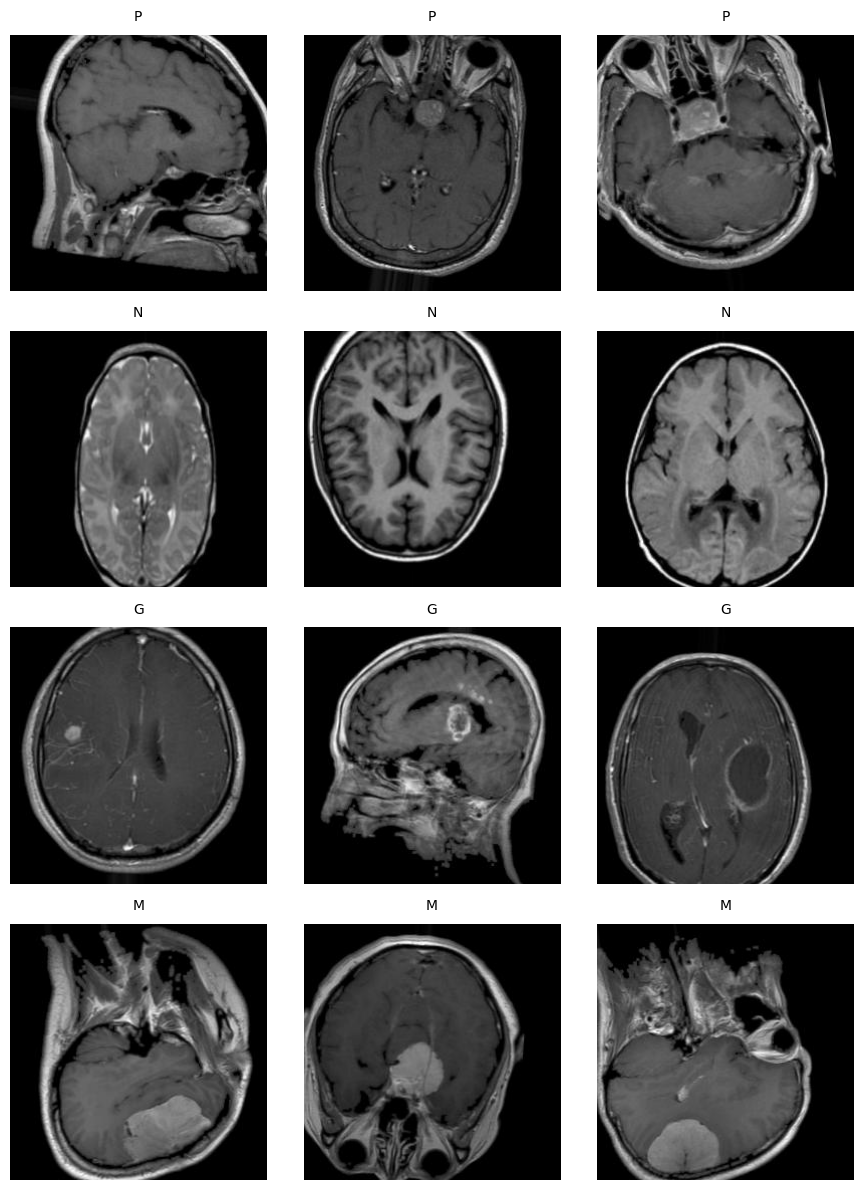

In [20]:
show_samples(r'/content/Dataset/train', class_names, num_samples=3)